# Muffin - Chihuahua Classification

In [126]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("samuelcortinhas/muffin-vs-chihuahua-image-classification")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/muffin-vs-chihuahua-image-classification


In [125]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [101]:
# Define the data directories
base_dir = '/root/.cache/kagglehub/datasets/samuelcortinhas/muffin-vs-chihuahua-image-classification/versions/2'
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')

In [102]:
# Create an ImageDataGenerator for data augmentation
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
)

In [103]:
train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(64, 64),
    batch_size=64,
    class_mode='binary',
)

# Load and augment the test data
test_generator = datagen.flow_from_directory(
    test_dir,
    target_size=(64, 64),
    batch_size=64,
    class_mode='binary',
)

# Load dataset
(train_images, train_labels) = next(train_generator)
(test_images, test_labels) = next(test_generator)

Found 4733 images belonging to 2 classes.
Found 1184 images belonging to 2 classes.


In [104]:
type(train_images[0])

numpy.ndarray

In [105]:
print(train_images.shape)

(64, 64, 64, 3)


In [106]:
print(test_images.shape) #batchsize, width, height, channel

(64, 64, 64, 3)


In [107]:
label_names = {
  0: "Chihuahua",
  1: "Muffin"
}

# Build Model

In [108]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(64,64,3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(256, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

In [109]:
# Compile the model
model.compile(loss=tf.keras.losses.binary_crossentropy,optimizer = "rmsprop",metrics=["accuracy"])

In [110]:
history = model.fit(
    train_generator,
    epochs=8,
    validation_data=test_generator
)

Epoch 1/8
74/74 ━━━━━━━━━━━━━━━━━━━━ 43s 514ms/step - accuracy: 0.7104 - loss: 1.1454 - val_accuracy: 0.5405 - val_loss: 1.7117
Epoch 2/8
74/74 ━━━━━━━━━━━━━━━━━━━━ 33s 450ms/step - accuracy: 0.8392 - loss: 0.4144 - val_accuracy: 0.5405 - val_loss: 4.3776
Epoch 3/8
74/74 ━━━━━━━━━━━━━━━━━━━━ 34s 464ms/step - accuracy: 0.8704 - loss: 0.3425 - val_accuracy: 0.5405 - val_loss: 2.6747
Epoch 4/8
74/74 ━━━━━━━━━━━━━━━━━━━━ 35s 472ms/step - accuracy: 0.8768 - loss: 0.2994 - val_accuracy: 0.5405 - val_loss: 5.9500
Epoch 5/8
74/74 ━━━━━━━━━━━━━━━━━━━━ 34s 464ms/step - accuracy: 0.8977 - loss: 0.2666 - val_accuracy: 0.5456 - val_loss: 1.9199
Epoch 6/8
74/74 ━━━━━━━━━━━━━━━━━━━━ 33s 446ms/step - accuracy: 0.9079 - loss: 0.2413 - val_accuracy: 0.7610 - val_loss: 0.8320
Epoch 7/8
74/74 ━━━━━━━━━━━━━━━━━━━━ 38s 510ms/step - accuracy: 0.9193 - loss: 0.2161 - val_accuracy: 0.6140 - val_loss: 1.8379
Epoch 8/8
74/74 ━━━━━━━━━━━━━━━━━━━━ 34s 464ms/step - accuracy: 0.9257 - loss: 0.1970 - val_accuracy: 0.

#Testing Accuracy

In [111]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

In [112]:
print(train_accuracy)

[0.7667441368103027, 0.8453412055969238, 0.8677371740341187, 0.8823156356811523, 0.8968941569328308, 0.9087259769439697, 0.9178110957145691, 0.9254173040390015]


In [113]:
print(val_accuracy)

[0.5405405163764954, 0.5405405163764954, 0.5405405163764954, 0.5405405163764954, 0.5456081032752991, 0.7609797120094299, 0.6140202879905701, 0.7288851141929626]


In [114]:
print(train_loss)

[0.729948103427887, 0.39334622025489807, 0.3412081003189087, 0.2925330698490143, 0.2603420317173004, 0.23901522159576416, 0.21292871236801147, 0.19249333441257477]


In [115]:
print(val_loss)

[1.7117059230804443, 4.37760591506958, 2.674699068069458, 5.949958324432373, 1.919944167137146, 0.8319681286811829, 1.8378844261169434, 0.7026877999305725]


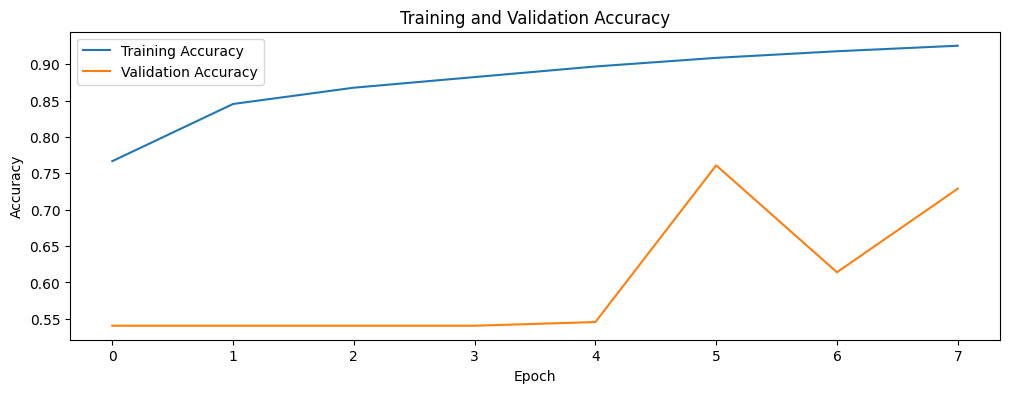

In [116]:
plt.figure(figsize=(12, 4))
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

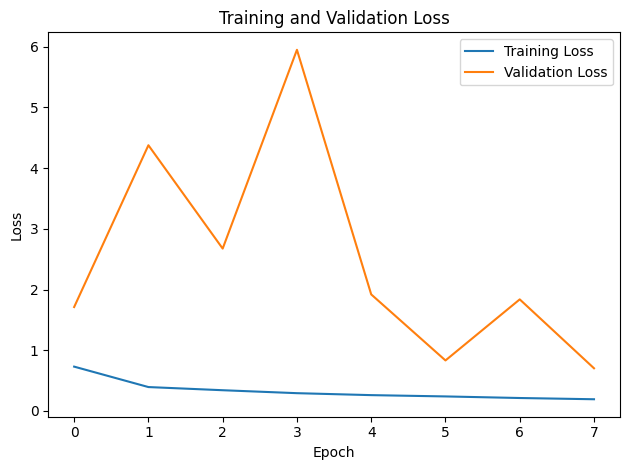

In [117]:
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [127]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

predictions = model.predict(test_generator)
predicted_classes = (predictions > 0.5).astype(int).flatten()
true_labels = test_generator.classes

accuracy = accuracy_score(true_labels, predicted_classes)
precision = precision_score(true_labels, predicted_classes)
recall = recall_score(true_labels, predicted_classes)
f1 = f1_score(true_labels, predicted_classes)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")


19/19 ━━━━━━━━━━━━━━━━━━━━ 10s 551ms/step
Accuracy: 0.51
Precision: 0.42
Recall: 0.18
F1-score: 0.25


In [128]:
predictions = model.predict(test_generator)  # Get probabilities
predicted_classes = (predictions > 0.5).astype(int).flatten()  # Convert to 0 or 1


19/19 ━━━━━━━━━━━━━━━━━━━━ 9s 489ms/step


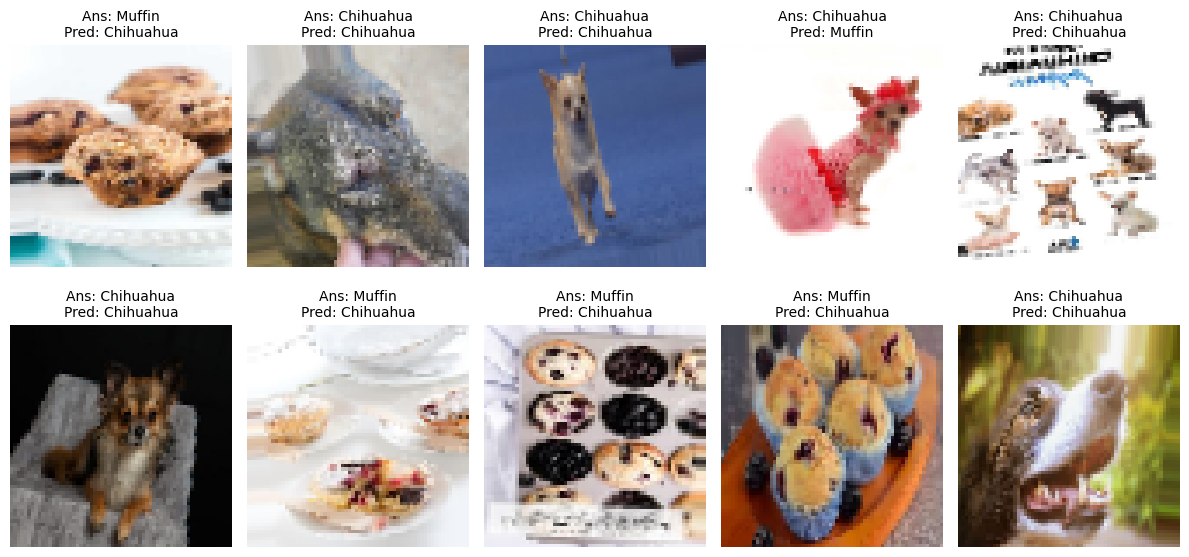

In [129]:
plt.figure(figsize=(12, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(test_images[i])
    title = (
        f"Ans: {label_names[int(test_labels[i])]}\n"  # Correct label
        f"Pred: {label_names[int(predicted_classes[i])]}"  # Predicted label
    )
    plt.title(title, fontsize=10)
    plt.axis('off')

plt.tight_layout()
plt.show()


#Save Model

In [130]:
model.save('my_image_classifier.h5')